In [3]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 465.6 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.4 MB 699.0 kB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 811.6 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 882.6 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 882.6 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 734.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [81]:
import lightgbm as lgbm

In [7]:
import pandas as pd

In [9]:
filename="Insurance_pre.csv"

In [11]:
dataset=pd.read_csv("Insurance_pre.csv")

In [13]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [15]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [17]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [19]:
dependent=dataset[['charges']]

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [31]:
regressor=lgbm.fit(X_train,y_train)

AttributeError: module 'lightgbm' has no attribute 'fit'

In [35]:
from lightgbm import LGBMRegressor

In [39]:
regressor=LGBMRegressor()

In [41]:
regressor.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 5
[LightGBM] [Info] Start training from score 13232.916456


LGBMRegressor()

In [73]:
import matplotlib.pyplot as plt

In [75]:
from sklearn import tree

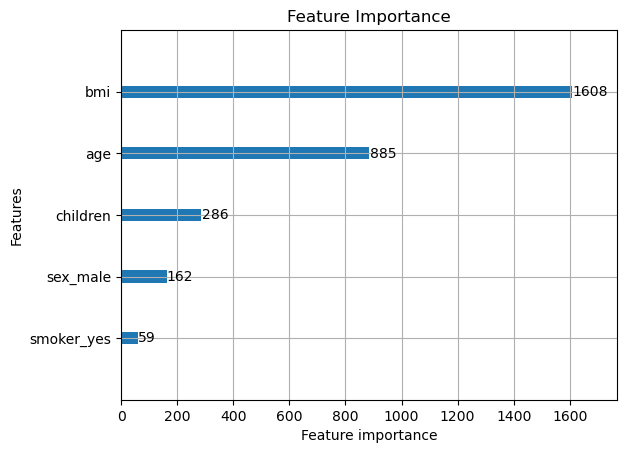

In [89]:
lgbm.plot_importance(regressor, max_num_features=10)
plt.title("Feature Importance")
plt.show()

In [43]:
y_pred=regressor.predict(X_test)

In [47]:
from sklearn.metrics import r2_score

In [49]:
r_score=r2_score(y_test,y_pred)

In [51]:
r_score

0.86603193419773

In [53]:
import pickle

In [55]:
filename="FinalizedLGBM model.sav"

In [57]:
pickle.dump(regressor,open(filename,'wb'))

In [61]:
loaded_model=pickle.load(open("FinalizedLGBM model.sav",'rb'))

In [69]:
result=loaded_model.predict([[35,30,2,1,0]])

In [71]:
result

array([6778.00755006])